# **Import Data**

In [718]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# **1 -EDA** 

In [719]:
df = pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [721]:
df.shape

(381, 13)

In [722]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [723]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [724]:
for review in df['Loan_ID'].unique():
    print(review)

LP001003
LP001005
LP001006
LP001008
LP001013
LP001024
LP001027
LP001029
LP001030
LP001032
LP001034
LP001036
LP001038
LP001041
LP001043
LP001047
LP001050
LP001068
LP001073
LP001086
LP001087
LP001095
LP001097
LP001098
LP001109
LP001112
LP001116
LP001119
LP001120
LP001123
LP001131
LP001136
LP001137
LP001138
LP001144
LP001146
LP001151
LP001155
LP001157
LP001164
LP001179
LP001194
LP001195
LP001197
LP001199
LP001205
LP001206
LP001222
LP001228
LP001238
LP001241
LP001245
LP001248
LP001250
LP001255
LP001259
LP001264
LP001265
LP001275
LP001279
LP001280
LP001282
LP001316
LP001319
LP001322
LP001325
LP001327
LP001333
LP001334
LP001343
LP001345
LP001367
LP001370
LP001384
LP001385
LP001387
LP001398
LP001405
LP001430
LP001431
LP001432
LP001443
LP001473
LP001478
LP001482
LP001487
LP001489
LP001491
LP001493
LP001507
LP001514
LP001518
LP001520
LP001528
LP001532
LP001535
LP001546
LP001560
LP001565
LP001572
LP001577
LP001578
LP001579
LP001581
LP001586
LP001603
LP001606
LP001608
LP001616
LP001630
LP001634
L

In [725]:
for review in df['Dependents'].unique():
    print(review)

1
0
2
3+
nan


In [726]:
for review in df['Self_Employed'].unique():
    print(review)

No
Yes
nan


In [727]:
for review in df['Loan_Amount_Term'].unique():
    print(review)

360.0
120.0
240.0
nan
180.0
60.0
300.0
480.0
84.0
12.0
36.0


In [728]:
for review in df['Credit_History'].unique():
    print(review)

1.0
nan
0.0


In [729]:
df.duplicated().sum()

0

In [730]:
#numerical = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']
##categorical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [731]:
#for col in categorical:
    #print(col, '\n')
    #print(df[col].value_counts(), '\n')

In [732]:
#for col in numerical:
    #print(col, '\n')
    #print(df[col].value_counts(), '\n')

In [733]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [734]:
( df.isna().sum() / df.shape[0] * 100)

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Data Cleaning 

Fix the loanID columns (parse str to number)

In [735]:
df['Loan_ID'] = pd.to_numeric(df['Loan_ID'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            0 non-null      float64
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 38.8+ KB


# Visualisation

<Axes: >

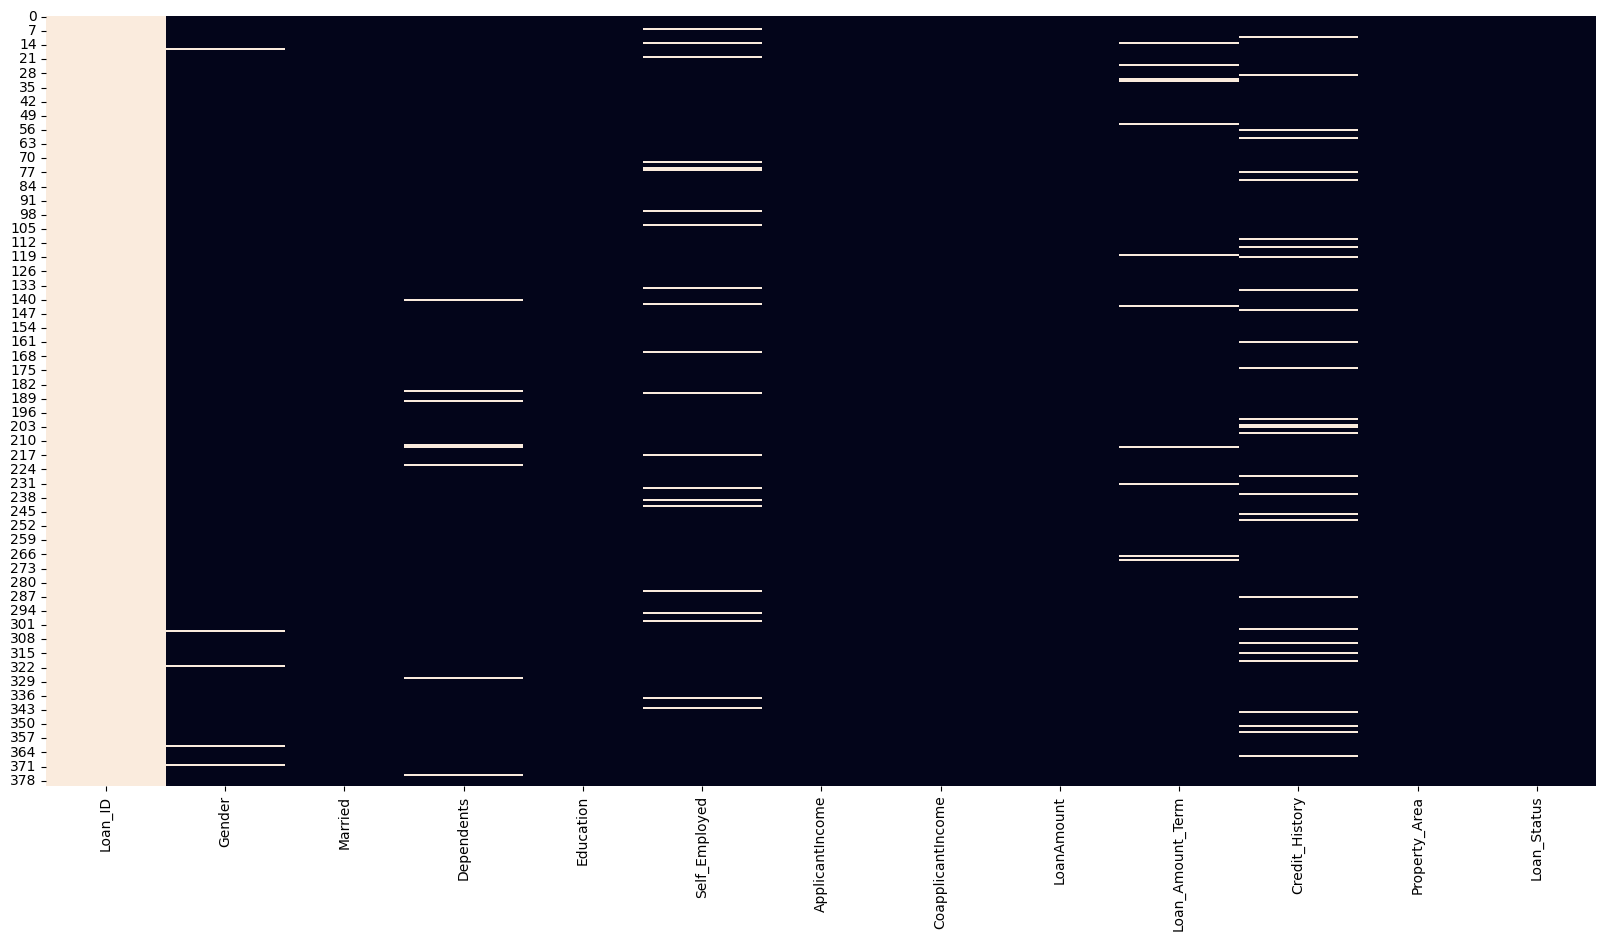

In [736]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [737]:
numerical = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

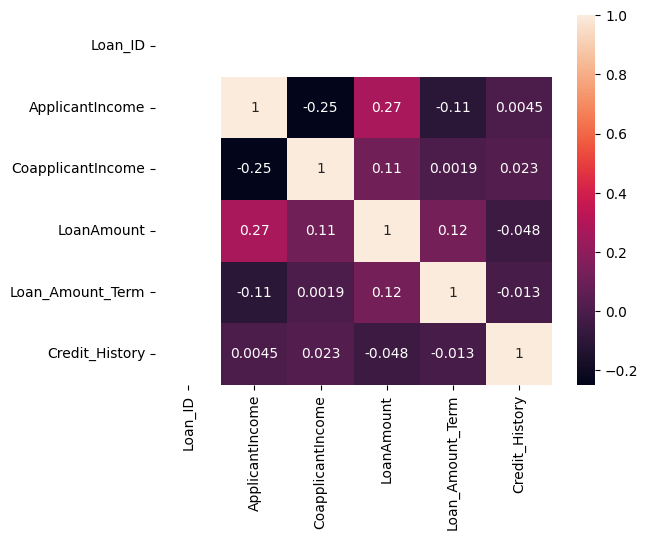

In [738]:
numerical = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

corr_matrix = df[numerical].corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

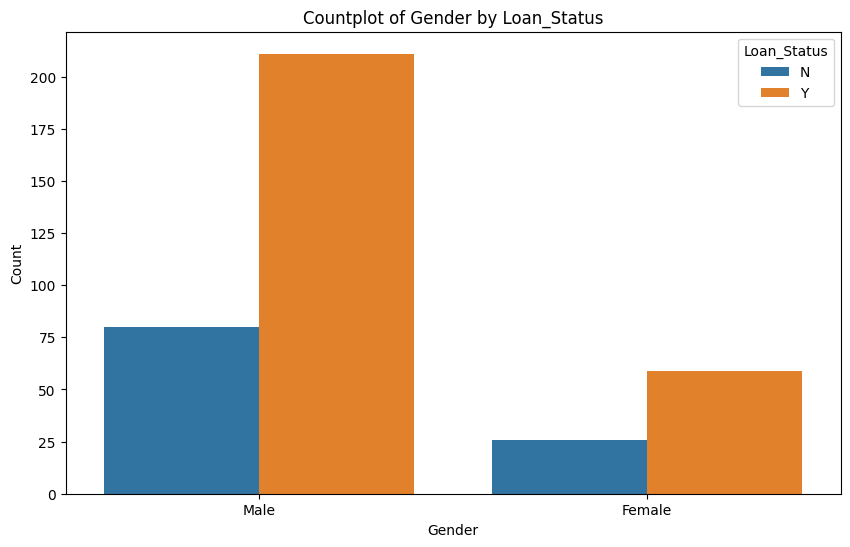

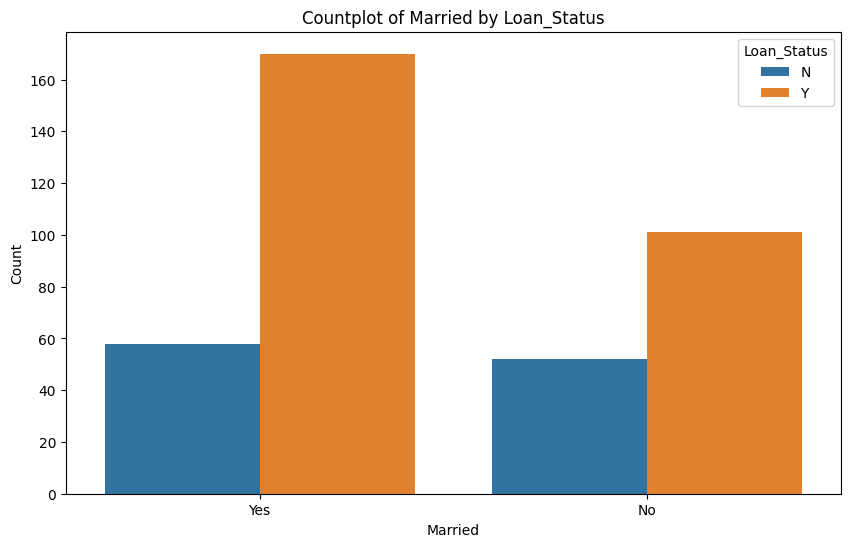

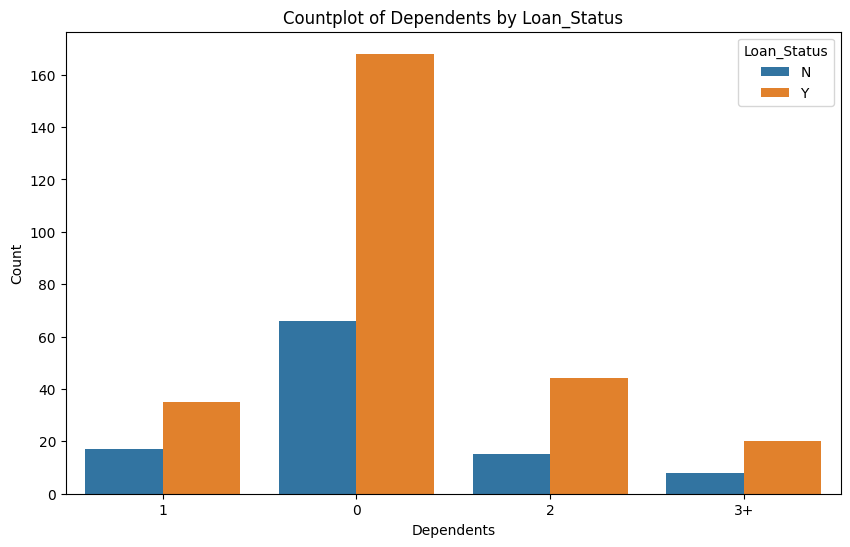

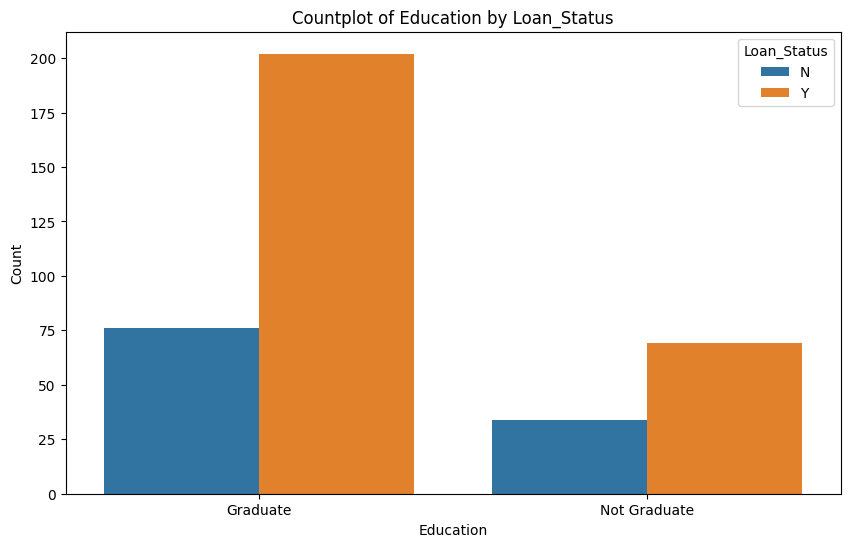

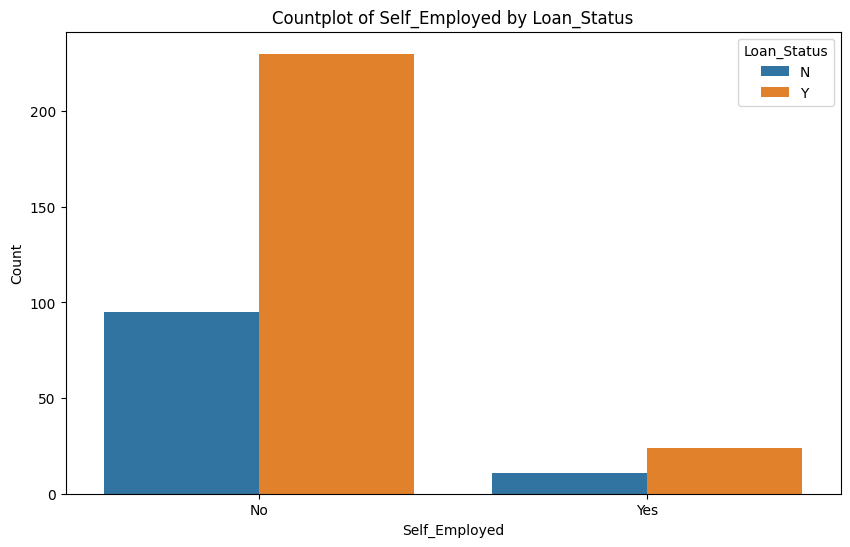

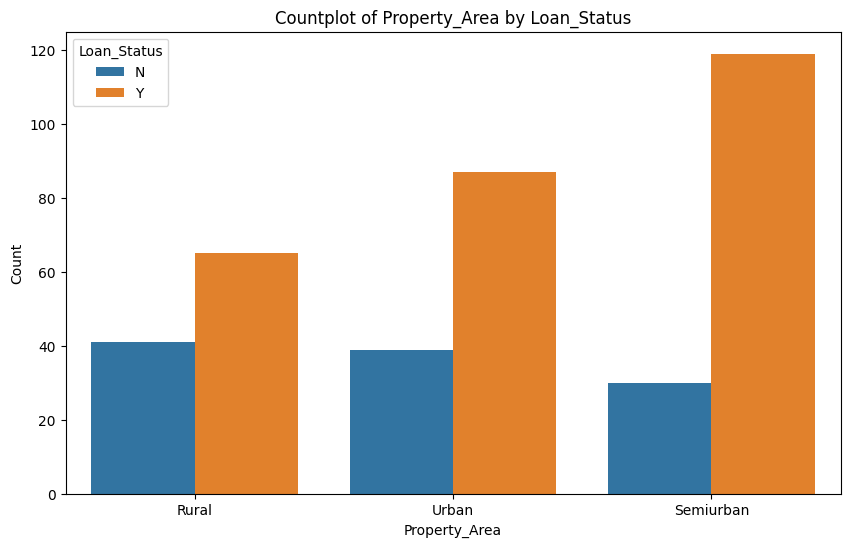

C:\Users\HP\AppData\Local\Temp\ipykernel_640\649183506.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Loan_Status')


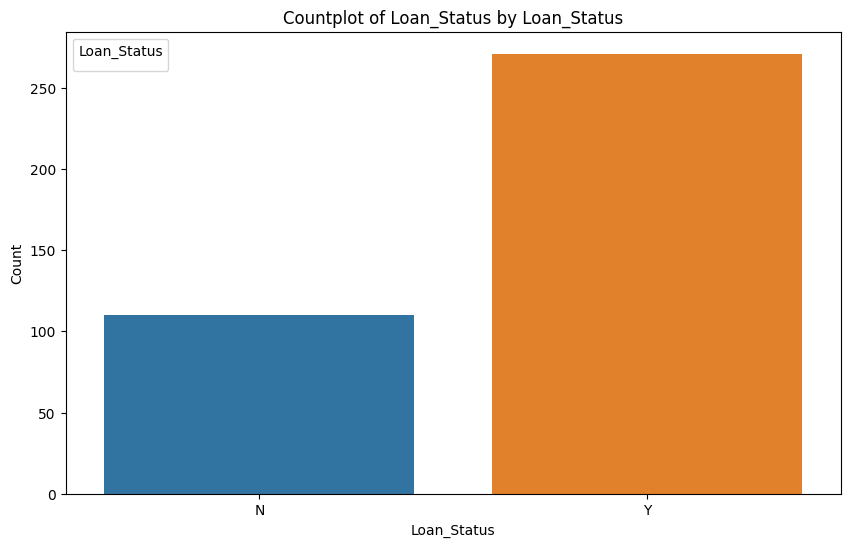

In [739]:
for feature in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Loan_Status', data=df)
    plt.title(f'Countplot of {feature} by Loan_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status')
    plt.show()


# Detect outlier

<Axes: xlabel='LoanAmount', ylabel='Count'>

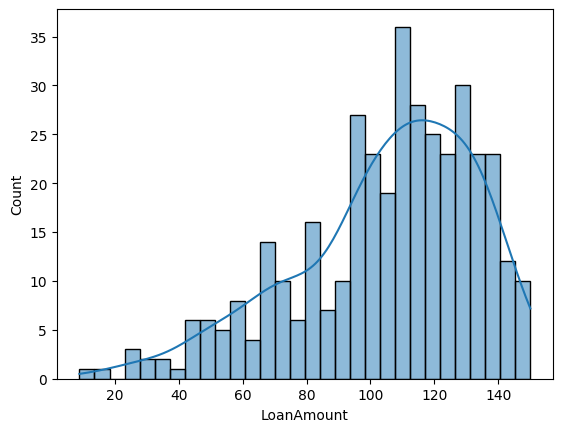

In [740]:
sns.histplot(df['LoanAmount'], bins=30, kde=True)

<Axes: xlabel='LoanAmount'>

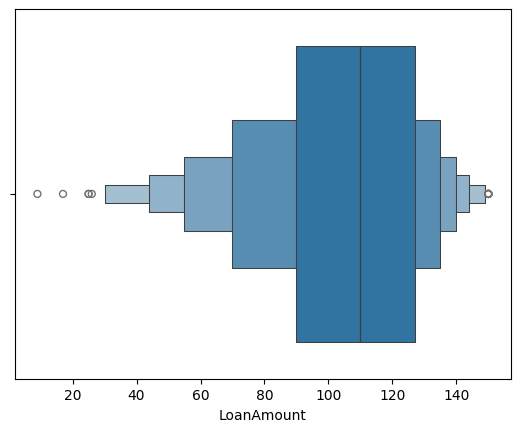

In [741]:
sns.boxenplot(x='LoanAmount', data = df)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

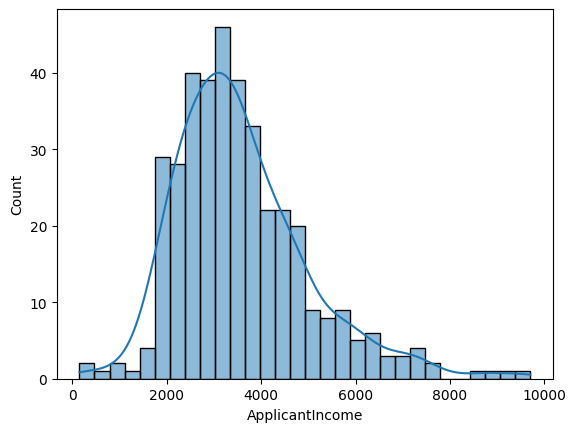

In [742]:
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)

<Axes: xlabel='ApplicantIncome'>

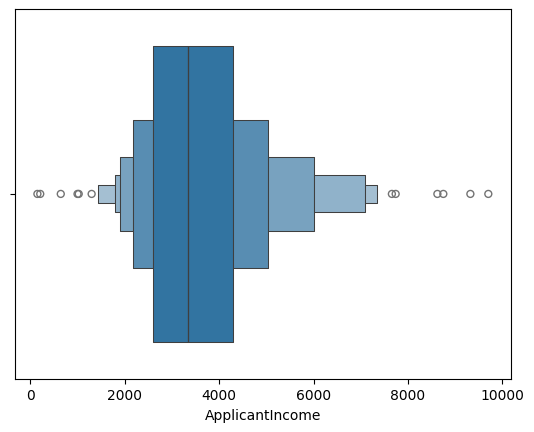

In [743]:
sns.boxenplot(x='ApplicantIncome', data = df) # there is outliers here 

<Axes: xlabel='CoapplicantIncome'>

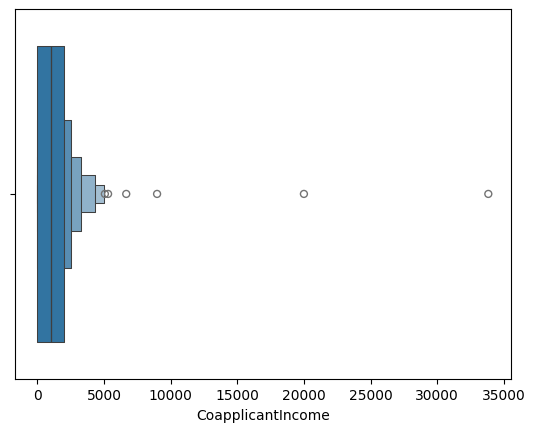

In [744]:
sns.boxenplot(x='CoapplicantIncome', data = df)

<Axes: xlabel='Loan_Amount_Term'>

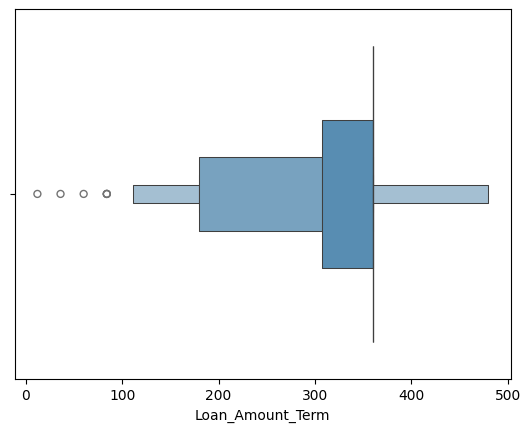

In [745]:
sns.boxenplot(x='Loan_Amount_Term', data = df)

In [746]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [747]:
(df.isna().sum() / df.shape[0] * 100)

Loan_ID              100.000000
Gender                 1.312336
Married                0.000000
Dependents             2.099738
Education              0.000000
Self_Employed          5.511811
ApplicantIncome        0.000000
CoapplicantIncome      0.000000
LoanAmount             0.000000
Loan_Amount_Term       2.887139
Credit_History         7.874016
Property_Area          0.000000
Loan_Status            0.000000
dtype: float64

# **Data Pre-Processing**

**Dealing with outliers**

In [748]:
for col in numerical:
    outliers = detect_outliers(df, 0, [col])
    df.drop(outliers, inplace=True)
    print(len(outliers))

0
14
5
8
0
0


**Dealing with nan value**

In [749]:
df.drop('Loan_ID', inplace= True, axis =1)

In [750]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [751]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent') 

df['Gender'] = imputer.fit_transform(df[ ['Gender'] ]).ravel()
df['Dependents'] = imputer.fit_transform(df[ ['Dependents'] ]).ravel() 
df['Self_Employed'] = imputer.fit_transform(df[ ['Self_Employed'] ]).ravel() 
df['Loan_Amount_Term'] = imputer.fit_transform(df[ ['Loan_Amount_Term'] ]).ravel() 
df['Credit_History'] = imputer.fit_transform(df[ ['Credit_History'] ]).ravel() 


In [752]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [753]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Categorical Data**

In [754]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()


categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])



In [755]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             354 non-null    int32  
 1   Married            354 non-null    int32  
 2   Dependents         354 non-null    int32  
 3   Education          354 non-null    int32  
 4   Self_Employed      354 non-null    int32  
 5   ApplicantIncome    354 non-null    int64  
 6   CoapplicantIncome  354 non-null    float64
 7   LoanAmount         354 non-null    float64
 8   Loan_Amount_Term   354 non-null    float64
 9   Credit_History     354 non-null    float64
 10  Property_Area      354 non-null    int32  
 11  Loan_Status        354 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 26.3 KB


**Spliting Data**

In [757]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [758]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=90)

**Dealing with imbalanced classes**

In [759]:
print(f"x: {x.shape}\ny: {y.shape}\n")
print(f"x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

x: (354, 11)
y: (354,)

x_train: (283, 11)
x_test: (71, 11)

y_train: (283,)
y_test: (71,)


In [760]:
sammpler = SMOTE(random_state=80)
x_train, y_train = sammpler.fit_resample(x_train, y_train)

In [761]:
y_train.value_counts()


Loan_Status
1    202
0    202
Name: count, dtype: int64

**Feature Scaling**

In [762]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **Machine Learning**

In [763]:
# Importing the necessary libraries for the models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Classifier
from sklearn.svm import SVC
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# XGBoost Classifier
from xgboost import XGBClassifier

In [764]:
models = {
    "LR": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='merror'),
}

In [765]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------\n')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(
        f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}\n')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
    print(classification_report(y_test, y_pred))
    print('*'*50, '\n')

Training Model LR 
--------------

Training Accuracy: 0.8094059405940595
Testing Accuracy: 0.8732394366197183

Testing Confusion Matrix: 
[[13  8]
 [ 1 49]]

              precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.86      0.98      0.92        50

    accuracy                           0.87        71
   macro avg       0.89      0.80      0.83        71
weighted avg       0.88      0.87      0.86        71

************************************************** 

Training Model KNN 
--------------

Training Accuracy: 0.8539603960396039
Testing Accuracy: 0.7605633802816901

Testing Confusion Matrix: 
[[15  6]
 [11 39]]

              precision    recall  f1-score   support

           0       0.58      0.71      0.64        21
           1       0.87      0.78      0.82        50

    accuracy                           0.76        71
   macro avg       0.72      0.75      0.73        71
weighted avg       0.78      0.

# the final model is Random Forest

In [767]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 1.0
Testing Accuracy: 0.9014084507042254


# Exporting the Model

In [769]:
import joblib
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']